<a href="https://colab.research.google.com/github/seismosmsr/hawaii_soils/blob/main/Hawaii_Soils.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
install.packages('sf')
install.packages('raster')
install.packages('exactextractr')
install.packages("googledrive")
install.packages("googletoken")
install.packages("DBI")
install.packages("RSQLite")
install.packages("RPostgreSQL")
install.packages("terra")
install.packages('randomForest')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘Rcpp’, ‘s2’, ‘units’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘googletoken’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the

In [2]:
library(ggplot2)
library(sf)
library(magrittr)
library(data.table)
library(raster)
library(exactextractr)
library(googledrive)
library(DBI)
library(terra)
library(randomForest)

Linking to GEOS 3.10.2, GDAL 3.4.3, PROJ 8.2.1; sf_use_s2() is TRUE

Loading required package: sp

The legacy packages maptools, rgdal, and rgeos, underpinning the sp package,
which was just loaded, will retire in October 2023.
Please refer to R-spatial evolution reports for details, especially
https://r-spatial.org/r/2023/05/15/evolution4.html.
It may be desirable to make the sf package available;
package maintainers should consider adding sf to Suggests:.
The sp package is now running under evolution status 2
     (status 2 uses the sf package in place of rgdal)

terra 1.7.46


Attaching package: ‘terra’


The following object is masked from ‘package:data.table’:

    shift


The following objects are masked from ‘package:magrittr’:

    extract, inset


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:ggplot2’:

    margin




In [5]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=c2397901e2c415fca6f2eb23f2a524a6&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWRldTVCVm12MUpackQtOE81dm9GVkx1di1nalFjTDcyTjdIM0Z1akxqM3RkVklTNkJRdHlnSG5hS0c1bjFCSUg3dG1EUSIsInN0YXRlIjoiYzIzOTc5MDFlMmM0MTVmY2E2ZjJlYjIzZjJhNTI0YTYifQ==


In [6]:
dir.create('/content/predictor_variables/')

In [7]:
# Hawaii GEDI data
# https://drive.google.com/file/d/1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy/view?usp=drive_link
drive_download(file = as_id('1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy'), path =  '/content/predictor_variables/Hawaii_GEDI_4A.gpkg', overwrite = FALSE)

File downloaded:

• Hawaii_GEDI.gpkg <id: 1UY3lxML0Y7bat_9-xEZQQHDkYRcODDZy>

Saved locally as:

• /content/predictor_variables/Hawaii_GEDI_4A.gpkg



In [26]:
# Hawaii 250m grid
# https://drive.google.com/file/d/1Jowm2XIdJHrt6N3tGhbLZ81UZZVMqAW8/view?usp=drive_link
drive_download(file = as_id('1Jowm2XIdJHrt6N3tGhbLZ81UZZVMqAW8'), path =  '/content/predictor_variables/HI_island_250_m_grid.gpkg', overwrite = FALSE)

Auto-refreshing stale OAuth token.

File downloaded:

• HI_island_250_m_grid.gpkg <id: 1Jowm2XIdJHrt6N3tGhbLZ81UZZVMqAW8>

Saved locally as:

• /content/predictor_variables/HI_island_250_m_grid.gpkg



In [8]:
folder_loc <- '/content/predictor_variables/TerraClimate/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1bIbwKYmzP2o6VEAWyLIRmeMQbGFDt-vX?usp=drive_link
folder_id <- "1bIbwKYmzP2o6VEAWyLIRmeMQbGFDt-vX"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}


File downloaded:

• Hawaii_Mean_Climate_1958_to_2023.tif <id: 1pMs5OsTwQ1N3kXO9bb3W-qfhxwcJtzIj>

Saved locally as:

• /content/predictor_variables/TerraClimate/Hawaii_Mean_Climate_1958_to_2023.tif

File downloaded:

• Maui_Mean_Climate_1958_to_2023.tif <id: 1Aglg9-srq187HYR38PFBVrodg3PpcqbE>

Saved locally as:

• /content/predictor_variables/TerraClimate/Maui_Mean_Climate_1958_to_2023.tif

File downloaded:

• Niihau_Mean_Climate_1958_to_2023.tif <id: 1T9RfMhwprSe0YV_ln5Xky9QTYycuh6M3>

Saved locally as:

• /content/predictor_variables/TerraClimate/Niihau_Mean_Climate_1958_to_2023.tif

File downloaded:

• Kauai_Mean_Climate_1958_to_2023.tif <id: 14bpiZID-VOQmsEVeQc9gFHe8JYK7w_ew>

Saved locally as:

• /content/predictor_variables/TerraClimate/Kauai_Mean_Climate_1958_to_2023.tif

File downloaded:

• Oahu_Mean_Climate_1958_to_2023.tif <id: 1zNyLGypMkzHYLoMnOTHhpZmZbil88Xxe>

Saved locally as:

• /content/predictor_variables/TerraClimate/Oahu_Mean_Climate_1958_to_2023.tif

File downloaded

In [9]:
folder_loc <- '/content/predictor_variables/SRTM_mTPI/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1YKJrZXTo-L4UpvJ0iEGo8yIX6uhoQ9AW?usp=drive_link
folder_id <- "1YKJrZXTo-L4UpvJ0iEGo8yIX6uhoQ9AW"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Kauai_SRTM_mTPI_Buffer.tif <id: 1APv2WFDHdAiwOhBcAw8db-b1NSIlsK1K>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Kauai_SRTM_mTPI_Buffer.tif

File downloaded:

• Oahu_SRTM_mTPI_Buffer.tif <id: 1MJEjAuHBeDmvfU_7W4j6RZJk6uLD4TE_>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Oahu_SRTM_mTPI_Buffer.tif

File downloaded:

• Maui_SRTM_mTPI_Buffer.tif <id: 1MsRCpuNGuIKInYotrbJ5S-Sagion0wJo>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Maui_SRTM_mTPI_Buffer.tif

File downloaded:

• Molakai_SRTM_mTPI_Buffer.tif <id: 1WRDZse9NGahMQ4h22bxvsv4XFp10JJZW>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Molakai_SRTM_mTPI_Buffer.tif

File downloaded:

• Hawaii_SRTM_mTPI_Buffer.tif <id: 1Qej-icN4NhaYZ8fhhc4bkVXZuD385sl3>

Saved locally as:

• /content/predictor_variables/SRTM_mTPI/Hawaii_SRTM_mTPI_Buffer.tif

File downloaded:

• Lanai_SRTM_mTPI_Buffer.tif <id: 1sz3x9fZufpjbtrIpY3ZovhNknmDmkR5n>

Saved locally as:

• /content/

In [10]:
folder_loc <- '/content/predictor_variables/Elevation/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1XmH9T9xVINZZfPFi39Wus1l7c0SKS4Am?usp=drive_link
folder_id <- "1XmH9T9xVINZZfPFi39Wus1l7c0SKS4Am"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Kauai_elevation.tif <id: 1SNmoJcKsyKSlG5DVye0c1pHvgWEQ5f1r>

Saved locally as:

• /content/predictor_variables/Elevation/Kauai_elevation.tif

File downloaded:

• Molokai_elevation.tif <id: 1ae2lpPQngdFx58mRpqt02Z1bQg-Tifen>

Saved locally as:

• /content/predictor_variables/Elevation/Molokai_elevation.tif

File downloaded:

• Oahu_elevation-0000000000-0000000000.tif
  <id: 1YMV_pXPQjmdam7ucBItWqzFJPPYQK7H5>

Saved locally as:

• /content/predictor_variables/Elevation/Oahu_elevation-0000000000-0000000000.tif

File downloaded:

• Niihau_elevation.tif <id: 1L6lodPtr7u70scb-gu_QliaAIyEwYAtc>

Saved locally as:

• /content/predictor_variables/Elevation/Niihau_elevation.tif

File downloaded:

• Hawaii_elevation.tif <id: 116xUvGPbJvJQrFZ7b59EzmcyAPHgKQmN>

Saved locally as:

• /content/predictor_variables/Elevation/Hawaii_elevation.tif

File downloaded:

• Lanai_elevation.tif <id: 1XHgejTU-XLW51qDtVprOcGSeuINa4X77>

Saved locally as:

• /content/predictor_variables/Elevati

In [11]:
folder_loc <- '/content/predictor_variables/LandForms/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1PkUR4GK50wC6Kgrvyy-d6067ypdX1dkx?usp=drive_link
folder_id <- "1PkUR4GK50wC6Kgrvyy-d6067ypdX1dkx"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Molakai_Landforms_Buffer.tif <id: 1ZBdccF_ELdIApV0SkAv2ZfWsZ0a0ae1f>

Saved locally as:

• /content/predictor_variables/LandForms/Molakai_Landforms_Buffer.tif

File downloaded:

• Lanai_Landforms_Buffer.tif <id: 1LU4LHzgkHHCmdOfWccniRJ8d0225AFu1>

Saved locally as:

• /content/predictor_variables/LandForms/Lanai_Landforms_Buffer.tif

File downloaded:

• Landforms_Buffer_2000m.tif <id: 1HMIkKM_02cVNWaB7-IYwnd414Wg5acnK>

Saved locally as:

• /content/predictor_variables/LandForms/Landforms_Buffer_2000m.tif

File downloaded:

• Hawaii_Landforms_Buffer.tif <id: 1qBNjiXKd-JJ8CICZvVTo42kkKjBNhYMT>

Saved locally as:

• /content/predictor_variables/LandForms/Hawaii_Landforms_Buffer.tif

File downloaded:

• Kauai_Landforms_Buffer.tif <id: 1oRmeE1kg5GswFcDdUaGU5jnui9Y2DpR3>

Saved locally as:

• /content/predictor_variables/LandForms/Kauai_Landforms_Buffer.tif

File downloaded:

• Oahu_Landforms_Buffer-0000000000-0000065536.tif
  <id: 1PcZoQe0l8WLgSagiWWUpTmWmmHmGnIRx>

Sav

In [12]:
folder_loc <- '/content/predictor_variables/LandSat_composite/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/1NzvurSghdEJdX0UsfdyuOcOyh6n3jUDo?usp=drive_link
folder_id <- "1NzvurSghdEJdX0UsfdyuOcOyh6n3jUDo"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Oahu_LS_composite_2012_2018-0000000000-0000044800.tif
  <id: 1ig_nM95kDvLr8dgYlp0PQyx65YAYkAbI>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Oahu_LS_composite_2012_2018-0000000000-0000044800.tif

File downloaded:

• Oahu_LS_composite_2012_2018-0000017920-0000026880.tif
  <id: 1R_TWiUhuLGchd-MWbL19NaY5wUSgNUwp>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Oahu_LS_composite_2012_2018-0000017920-0000026880.tif

File downloaded:

• Oahu_LS_composite_2012_2018-0000008960-0000000000.tif
  <id: 1bYSagWcYRfVwL8WnD7RDFYbL8SWM3709>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Oahu_LS_composite_2012_2018-0000008960-0000000000.tif

File downloaded:

• Oahu_LS_composite_2012_2018-0000026880-0000044800.tif
  <id: 15wOx4LbskGPYH2MBokQ2g210Z69OR10V>

Saved locally as:

• /content/predictor_variables/LandSat_composite/Oahu_LS_composite_2012_2018-0000026880-0000044800.tif

File downloaded:

• Hawaii_LS_composite_

In [13]:
folder_loc <- '/content/predictor_variables/DynamicWorld_landcover/'
dir.create(folder_loc)

# https://drive.google.com/drive/folders/152pjTArpwlDVGjXFoSU9bmo1BDSKdCqq?usp=drive_link
folder_id <- "152pjTArpwlDVGjXFoSU9bmo1BDSKdCqq"
folder_files <- drive_ls(as_id(folder_id))

for (i in 1:nrow(folder_files)) {
  file_id <- folder_files$id[i]
  file_name <- folder_files$name[i]
  drive_download(as_id(file_id), path = paste0(folder_loc,file_name), overwrite = TRUE)
}

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000000000-0000074240.tif
  <id: 1Tnsd4PZQSPdEbdX3VtH-_doNBWuyWMtl>

Saved locally as:

• /content/predictor_variables/DynamicWorld_landcover/Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000000000-0000074240.tif

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000000000-0000185600.tif
  <id: 19DtTLjlI_AVs4xBGyW5wjulRZljoOCC9>

Saved locally as:

• /content/predictor_variables/DynamicWorld_landcover/Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000000000-0000185600.tif

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000007424-0000074240.tif
  <id: 1onONrmPMlNMtLjBkensOCDfagUTROlW2>

Saved locally as:

• /content/predictor_variables/DynamicWorld_landcover/Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000007424-0000074240.tif

File downloaded:

• Oahu_Average_Land_Cover_Buffer_2000m_2015_to_2019-0000007424-0000089088.tif
  <id: 1K3KKn6GQhq1RKZaXwqaxCtl41QacT

In [3]:
  # https://drive.google.com/file/d/1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv/view?usp=drive_link
drive_download(as_id('1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv'), path = paste0('/content/fia.gpkg'), overwrite = TRUE)
fia_dt <-  st_read('/content/fia.gpkg')

Is it OK to cache OAuth access credentials in the folder ~/.cache/gargle
between R sessions?
1: Yes
2: No


Selection: 1


Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=f4f33a9205029632e6f36b6f36d6642e&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbUplakJQenQzVTB2Q29IbE0zYS1FS044c3FTOXRyc1ZJTUlfZXBWWXlyU2NIc2pMR2lGelJmUHFRSzh3WGExUSIsInN0YXRlIjoiZjRmMzNhOTIwNTAyOTYzMmU2ZjM2YjZmMzZkNjY0MmUifQ==


File downloaded:

• Soils_Joined.gpkg <id: 1ryTzWz0t9mgI5ynPvMzM21D135dLJvWv>

Saved locally as:

• /content/fia.gpkg



Reading layer `Soils_Joined' from data source `/content/fia.gpkg' using driver `GPKG'
Simple feature collection with 750 features and 197 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -159.7567 ymin: 19.02513 xmax: -154.8152 ymax: 22.18564
Geodetic CRS:  WGS 84


In [4]:
dir_list <- list.dirs('/content/predictor_variables')[-1]

names(dir_list) <- list.dirs('/content/predictor_variables',full.names = FALSE)[-1]

In [5]:
names(dir_list) %>% lapply(function(x){
  print(x)
 y <- dir_list[[x]]
 vrt(y %>% lapply(function(x){list.files(y, pattern='*.tif',full.names = T)}) %>%unlist,filename=paste0(y,'/',x,'.vrt'),overwrite=T)
 print(paste('Done',x))
})

[1] "DynamicWorld_landcover"
[1] "Done DynamicWorld_landcover"
[1] "Elevation"
[1] "Done Elevation"
[1] "LandForms"
[1] "Done LandForms"
[1] "LandSat_composite"
[1] "Done LandSat_composite"
[1] "SRTM_mTPI"
[1] "Done SRTM_mTPI"
[1] "TerraClimate"
[1] "Done TerraClimate"


[[1]]
[1] "Done DynamicWorld_landcover"

[[2]]
[1] "Done Elevation"

[[3]]
[1] "Done LandForms"

[[4]]
[1] "Done LandSat_composite"

[[5]]
[1] "Done SRTM_mTPI"

[[6]]
[1] "Done TerraClimate"

In [6]:
 raster_list <- list.files('/content/predictor_variables',pattern = '*.vrt',full.names = T,recursive = T) %>% lapply(stack) %>% lapply(rast)

raster_list
  # # Use gdalbuildvrt to create VRT
  # gdalbuildvrt(destfile = paste0(x,'/',x,'.vrt'),
  #              files =   (x %>% lapply(function(x){list.files(x, pattern='*.tif',full.names = T)})),
  #              separate = FALSE, # Change to TRUE if you want separate bands
  #              overwrite = TRUE)




[[1]]
class       : SpatRaster 
dimensions  : 371833, 2204931, 10  (nrow, ncol, nlyr)
resolution  : 9.031842e-05, 9.031842e-05  (x, y)
extent      : -178.4436, 20.70229, 18.8654, 52.44877  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs 
source      : DynamicWorld_landcover.vrt 
names       : Dynam~ver_1, Dynam~ver_2, Dynam~ver_3, Dynam~ver_4, Dynam~ver_5, Dynam~ver_6, ... 

[[2]]
class       : SpatRaster 
dimensions  : 35816, 87898, 1  (nrow, ncol, nlyr)
resolution  : 0.0002694946, 0.0002694946  (x, y)
extent      : -178.4436, -154.7556, 18.8652, 28.51742  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs 
source      : Elevation.vrt 
name        : Elevation 

[[3]]
class       : SpatRaster 
dimensions  : 80530, 270460, 1  (nrow, ncol, nlyr)
resolution  : 0.0002694946, 0.0002694946  (x, y)
extent      : -178.4437, -105.5562, 18.86543, 40.56783  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs 
source      : 

In [7]:
gedi_dt <- st_read('/content/predictor_variables/Hawaii_GEDI_4A.gpkg') %>% data.table()

Reading layer `Hawaii_GEDI_2' from data source 
  `/content/predictor_variables/Hawaii_GEDI_4A.gpkg' using driver `GPKG'
Integer64 values larger than 9.0072e+15 lost significance after conversion to double;
use argument int64_as_string = TRUE to import them lossless, as character
Simple feature collection with 4839466 features and 28 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -160.6006 ymin: 18.86556 xmax: -154.7559 ymax: 22.28996
Geodetic CRS:  WGS 84


In [8]:
grid_dt <- st_read('/content/predictor_variables/HI_island_250_m_grid.gpkg') %>% data.table()

Reading layer `grid' from data source 
  `/content/predictor_variables/HI_island_250_m_grid.gpkg' using driver `GPKG'
Simple feature collection with 263630 features and 5 fields
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: 57161.36 ymin: 8702.317 xmax: 572661.4 ymax: 381202.3
Projected CRS: NAD_1983_HARN_StatePlane_Hawaii_1_FIPS_5101


In [77]:
# fia_dt

Warning message:
“`qplot()` was deprecated in ggplot2 3.4.0.”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 99 rows containing non-finite values (`stat_bin()`).”


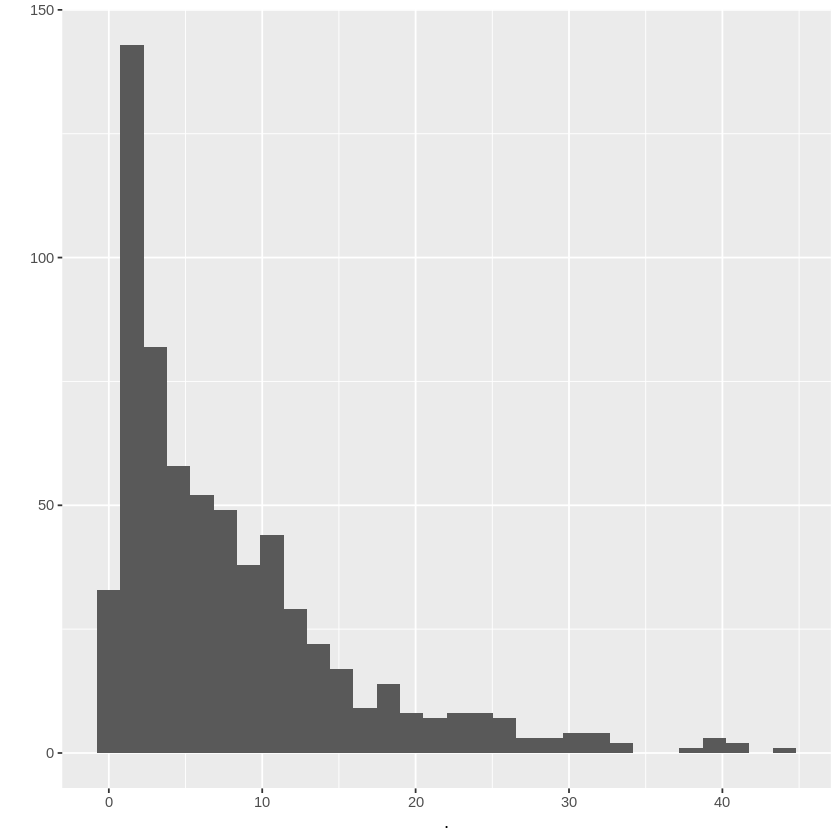

In [9]:
fia_dt[,c('C_TOTAL_PCT','geom')]$C_TOTAL_PCT %>% qplot

In [10]:
grid_int_dt <- fia_dt[,c('PLOT','C_TOTAL_PCT','geom')] %>% st_as_sf() %>% st_transform(4135) %>% st_buffer(10000) %>% st_transform(4326) %>% st_intersects(grid_dt %>% st_as_sf %>% st_transform(4326))

In [178]:
  dummy_geom <- fia_dt %>% st_as_sf() %>% st_transform(4135) %>% st_buffer(1000) %>% st_transform(4326)
  fia_dt$dummy_geom <- dummy_geom$geom

  example_poly <- (fia_dt %>%data.table)[,c('PLOT','C_TOTAL_PCT','dummy_geom')]

  ls_dt <- data.table(exact_extract(raster_list[[4]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(ls_dt) <- c("ultra_blue", "blue", "green", "red", "infrared", "sw1", "sw2")

  climate_dt <- data.table(exact_extract(raster_list[[6]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(climate_dt) <- c("aet", "def", "pdsi", "pet", "pr", "ro", "soil", "srad", "swe", "tmmn", "tmmx", "vap", "vpd", "vs")

  elevation_dt <- data.table(exact_extract(raster_list[[2]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(elevation_dt) <- c("elevation")

  rf_dt <- data.table(example_poly,ls_dt,climate_dt,elevation_dt)

Cannot preload entire working area of 1520067948 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 217152564 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Warning message:
“Removed 177 rows containing missing values (`geom_point()`).”


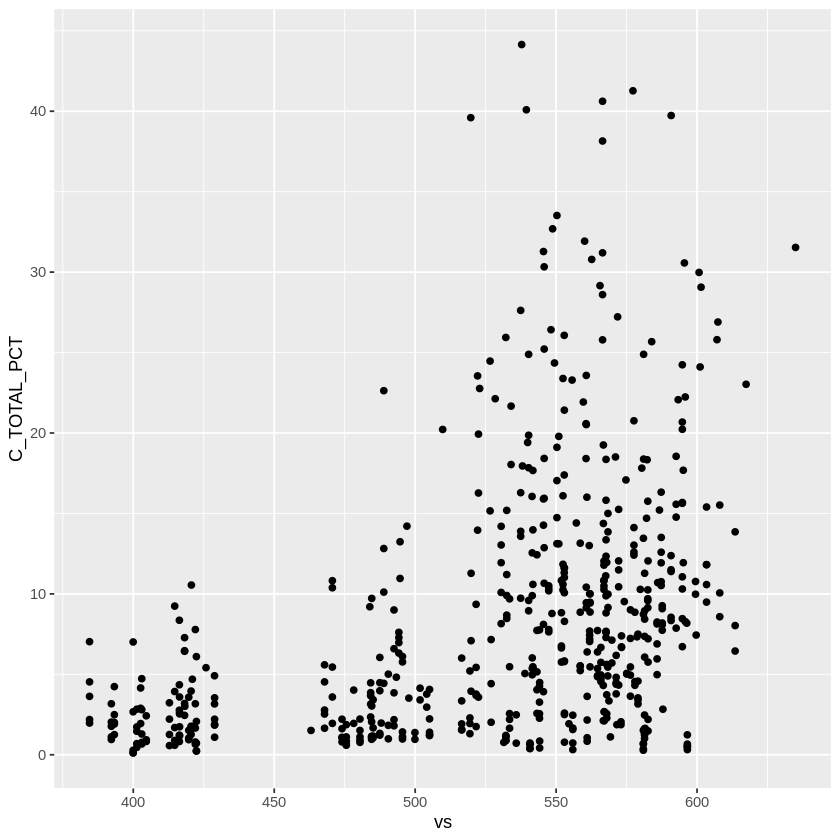

In [181]:
rf_dt %>%
  ggplot(aes(x=vs,y=C_TOTAL_PCT))+
  geom_point()

In [16]:
# rf_dt$`SRTM_mTPI

In [22]:
sim_dt <-
1:50 %>% lapply(function(m){

  dummy_geom <- grid_dt[grid_int_dt %>% lapply(function(x){sample(x,1)}) %>% unlist,] %>% st_as_sf() %>% st_transform(4135) %>% st_buffer(250) %>% st_transform(4326)
  fia_dt$dummy_geom <- dummy_geom$geom

  example_poly <- (fia_dt %>%data.table)[,c('PLOT','C_TOTAL_PCT','dummy_geom')]

  cover_dt <- data.table(exact_extract(raster_list[[1]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(cover_dt) <- c("water", "trees", "grass", "flooded_vegetation", "crops", "shrub_and_scrub", "built", "bare", "snow_and_ice",'max')

  elevation_dt <- data.table(exact_extract(raster_list[[2]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(elevation_dt) <- c("elevation")

  landform_dt <- data.table(exact_extract(raster_list[[3]],example_poly %>% st_as_sf,'mode') %>% data.table)
  names(landform_dt) <- c("landform")

  ls_dt <- data.table(exact_extract(raster_list[[4]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(ls_dt) <- c("ultra_blue", "blue", "green", "red", "infrared", "sw1", "sw2")

  tpi_dt <- data.table(exact_extract(raster_list[[5]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(tpi_dt) <- c("SRTM_mTPI")

  climate_dt <- data.table(exact_extract(raster_list[[6]],example_poly %>% st_as_sf,'mean') %>% data.table)
  names(climate_dt) <- c("aet", "def", "pdsi", "pet", "pr", "ro", "soil", "srad", "swe", "tmmn", "tmmx", "vap", "vpd", "vs")



  rf_dt <- data.table(example_poly,cover_dt,elevation_dt,landform_dt,tpi_dt,climate_dt)

  # rf_dt %>% head
  x_var <- (rf_dt %>% names)[-c(1,2,3)]

  rf_form <- as.formula(paste0('C_TOTAL_PCT~',paste(x_var,collapse = '+')))

  # print(rf_form)

  rf_dt <- rf_dt[complete.cases(rf_dt[,-3]),]

  rf_terra <- randomForest(rf_form,rf_dt,verbose=T)

  rf_imp_dt <- rf_terra$importance %>% t %>% data.table

  out_dt <- data.table(rf_dt[,c('PLOT','C_TOTAL_PCT','dummy_geom')],data.table(predicted = rf_terra$predicted),rf_imp_dt[rep(1,nrow(rf_dt)),])

  return(out_dt)
  }) %>%
  rbindlist

Cannot preload entire working area of 19215368950 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215838344 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215856732 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1510997124 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19164666270 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215285850 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215255776 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1506790432 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19275431640 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216511540 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216511540 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1515580780 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19329054020 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217122800 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217122800 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1519859600 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 18828618350 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 211502032 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 211502032 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1480514224 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19386542910 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217761201 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217761201 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1524328407 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19123042680 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214805160 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214793364 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1503553548 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19617571770 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220390653 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220360320 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1542522240 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19258794900 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216339966 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216339966 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1514379762 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19372520310 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217604420 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217604420 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1523230940 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19620926720 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220413861 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220413861 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1542897027 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19310829840 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216903050 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216903050 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1518321350 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19440373040 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218382600 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218382600 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1528678200 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19484006330 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218870070 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218870070 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1532090490 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19361128710 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217477160 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217507338 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1522551366 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19242734300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216158436 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216158436 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1513109052 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19534126240 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219424058 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219424058 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1535968406 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19212569250 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215827512 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215827512 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1510792584 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19645222520 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220659120 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220659120 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1544613840 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19516008420 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219217551 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219217551 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1534522857 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19741778400 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221743737 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221743737 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1552206159 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19063386210 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214152966 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214134765 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1498943355 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19482581840 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218837968 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218837968 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1531865776 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19349387200 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217360220 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217360220 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1521521540 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19435814640 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218311224 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218329551 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1528306857 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19446177240 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218439513 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218421186 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1528948302 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19513056410 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219196728 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219184752 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1534293264 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19687707820 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221147892 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221147892 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1548035244 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19482103140 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218850660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218850660 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1531954620 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19141380440 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215014360 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215014360 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1505100520 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19214933100 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215837872 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215849633 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1510947431 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19530474220 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219383252 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219395310 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1535767170 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19170227340 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215332299 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215350512 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1507453584 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19448833770 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218475228 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218445005 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1529115035 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19118637540 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214748112 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214759870 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1503319090 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19448360750 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218473910 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 218461900 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1529233300 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19525557100 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219330276 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219330276 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1535311932 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19404930480 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217960415 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217948470 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1525639290 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19279438250 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216568593 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 216580356 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1516062492 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19564212880 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219772273 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 219765864 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1538361048 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19151899200 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215127906 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215139699 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1505977893 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19741074100 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221768412 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221756341 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1552294387 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19686195200 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221128908 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221128908 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1547902356 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19702673600 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221325020 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 221312998 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1549190986 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19185660780 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215517156 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215498952 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1508492664 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19101322280 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214566744 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 214548585 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1501840095 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19170679200 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215333424 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215345196 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1507416372 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19639817100 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220606848 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 220606848 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1544247936 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19328182120 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217111204 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 217093176 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1519652232 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


Cannot preload entire working area of 19149584400 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215131760 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 215113440 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%


Cannot preload entire working area of 1505794080 cells with max_cells_in_memory = 3e+07. Raster values will be read for each feature individually.



  |======================================================================| 100%
  |======================================================================| 100%
  |======================================================================| 100%


In [23]:
# Write to GeoPackage
sim_dt %>% st_write("/content/sim_results.gpkg")

Layer sim_results in dataset /content/sim_results.gpkg already exists:
use either append=TRUE to append to layer or append=FALSE to overwrite layer


ERROR: ignored

In [ ]:
# 1uVZCzCb5gRE8wfZckspRuKz1TQd5LpeM
drive_upload("/content/sim_results_2.gpkg", path = as_id("1uVZCzCb5gRE8wfZckspRuKz1TQd5LpeM"))

In [159]:
# sim_dt

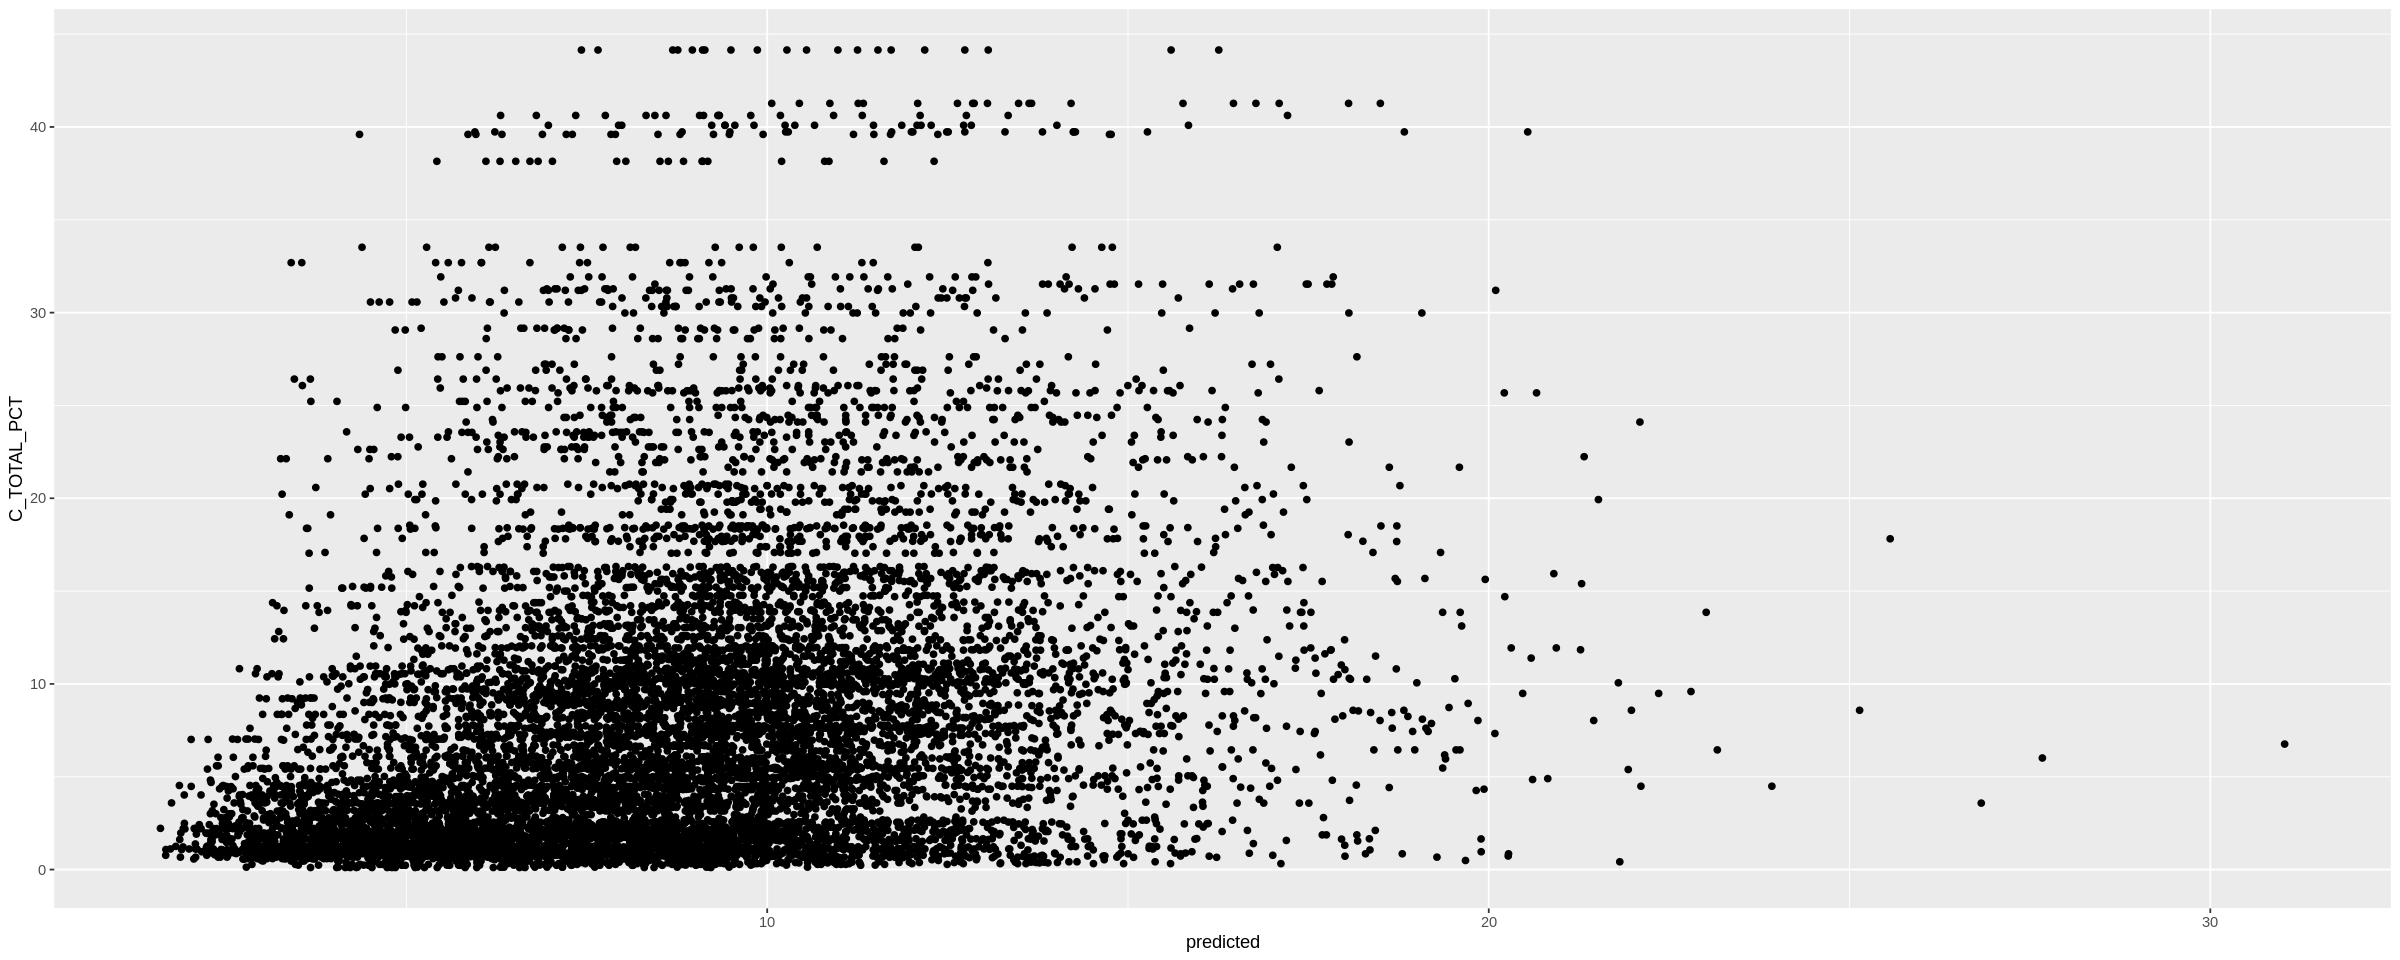

In [215]:
sim_dt %>%
  ggplot(aes(y=C_TOTAL_PCT,x=predicted))+
    geom_point()

In [202]:
# Load the necessary library
library(repr)

# Adjust width and height of plots
options(repr.plot.width=20, repr.plot.height=8)

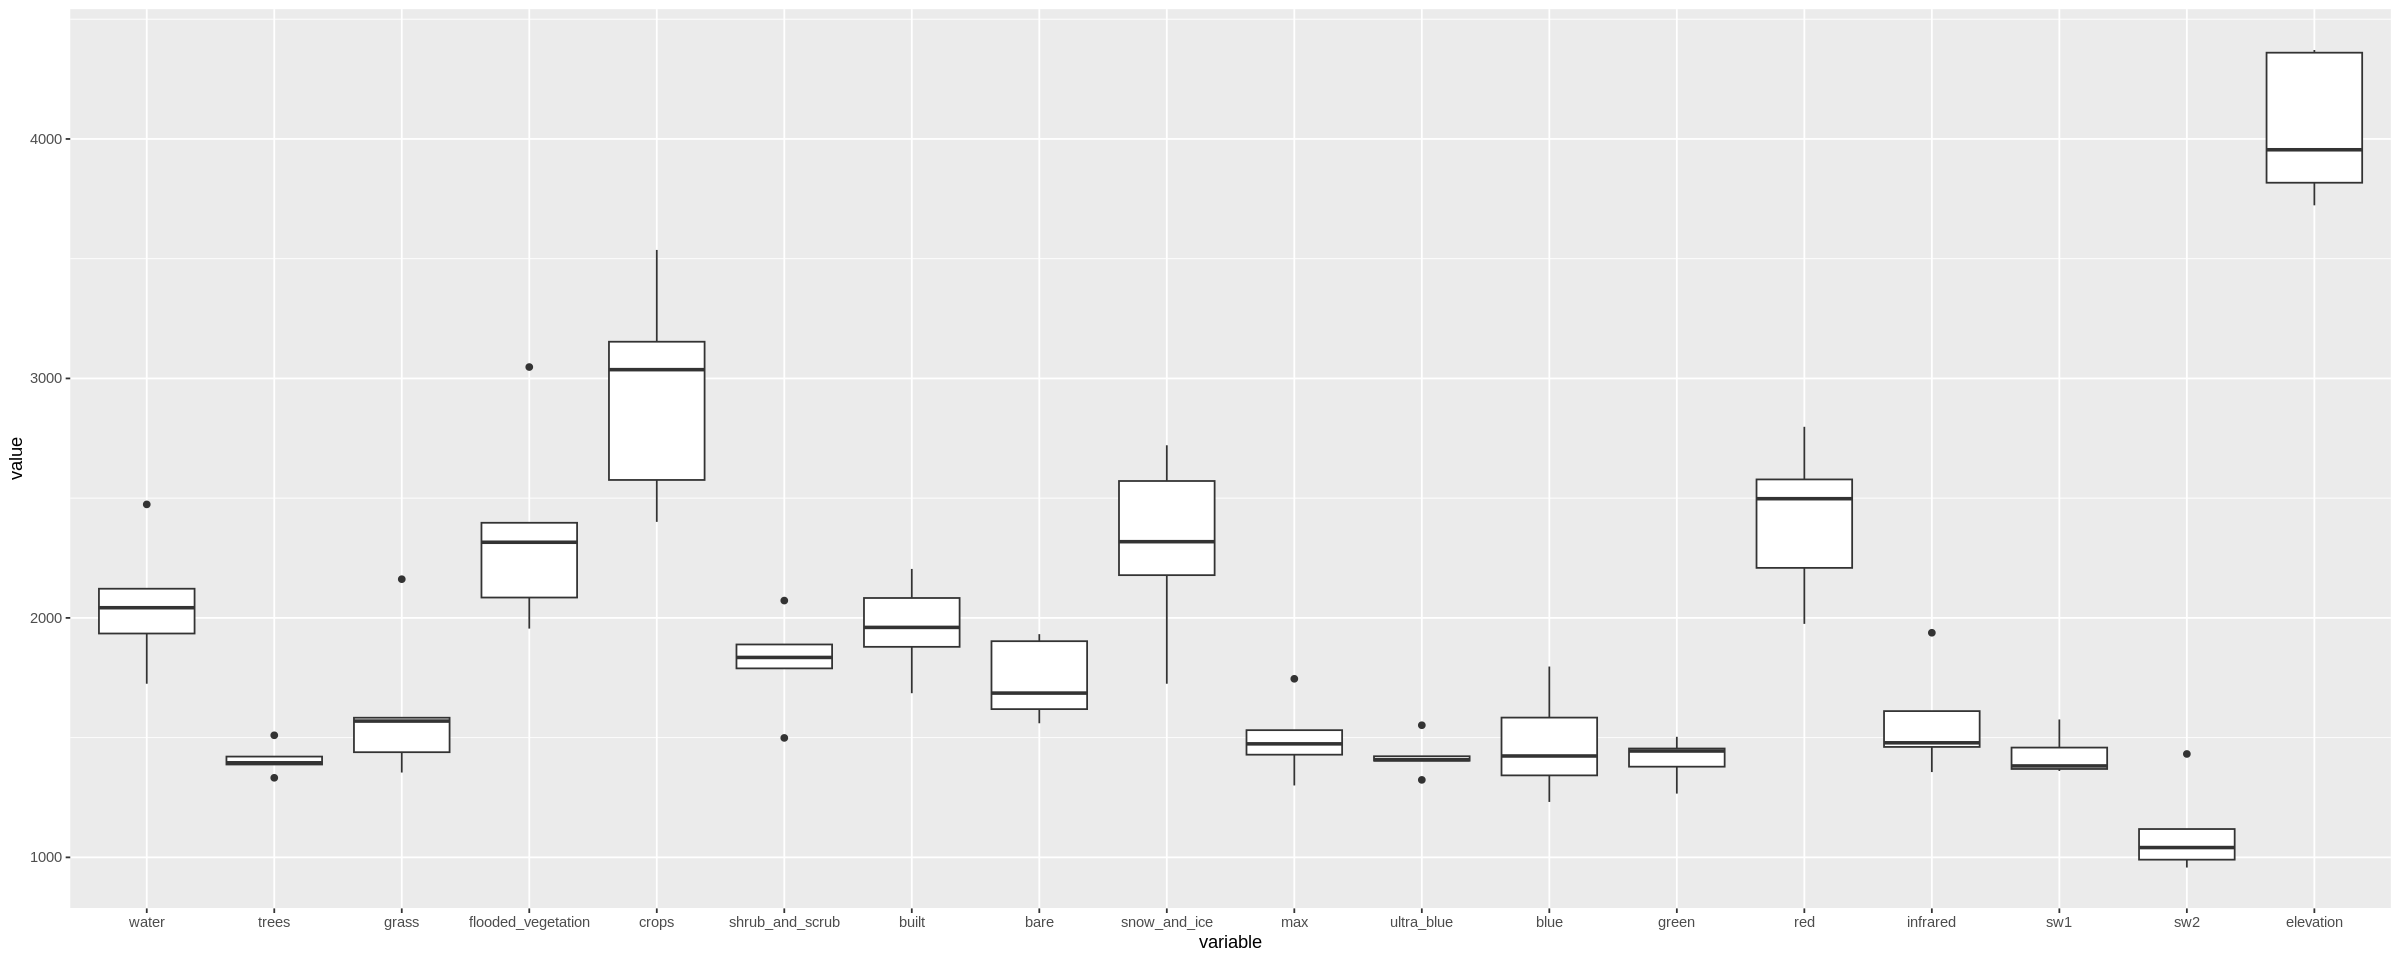

In [217]:
# for(i in 1:10){

sim_dt[,residual := predicted-C_TOTAL_PCT]

sim_dt[,residual_per := residual/C_TOTAL_PCT]

samp_dt <- sim_dt[residual_per>-.05 &residual_per <.05]
plot <- sample(samp_dt$PLOT,1)
# print(plot)
(samp_dt[PLOT==plot] %>% melt(id.vars = c("PLOT","C_TOTAL_PCT","dummy_geom","predicted",'residual','residual_per')) %>%
  ggplot(aes(x=variable,y=value))+
  geom_boxplot() )%>% plot
# }

In [57]:
dummy_geom <- grid_dt[grid_int_dt %>% lapply(function(x){sample(x,1)}) %>% unlist,] %>% st_as_sf() %>% st_transform(4135) %>% st_buffer(2500) %>% st_transform(4326)

In [58]:
fia_dt$dummy_geom <- dummy_geom$geom

In [59]:
example_poly <- (fia_dt %>%data.table)[,c('C_TOTAL_PCT','dummy_geom')]

In [60]:
rf_dt <- data.table(example_poly,exact_extract(raster_list[[6]],example_poly %>% st_as_sf,'mean') %>% data.table)

  |======================================================================| 100%


In [61]:
# rf_dt

In [62]:
names(rf_dt)[-c(1,2)] <- c("aet", "def", "pdsi", "pet", "pr", "ro", "soil", "srad", "swe", "tmmn", "tmmx", "vap", "vpd", "vs")


In [71]:
rf_form <- as.formula(paste0('C_TOTAL_PCT~',paste((rf_dt %>% names)[-c(1,2)],collapse = '+')))
rf_form

C_TOTAL_PCT ~ aet + def + pdsi + pet + pr + ro + soil + srad + 
    swe + tmmn + tmmx + vap + vpd + vs


Call:
 randomForest(formula = rf_form, data = rf_dt[complete.cases(rf_dt[,      -2]), ], verbose = T) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 4

          Mean of squared residuals: 51.29394
                    % Var explained: 20.63

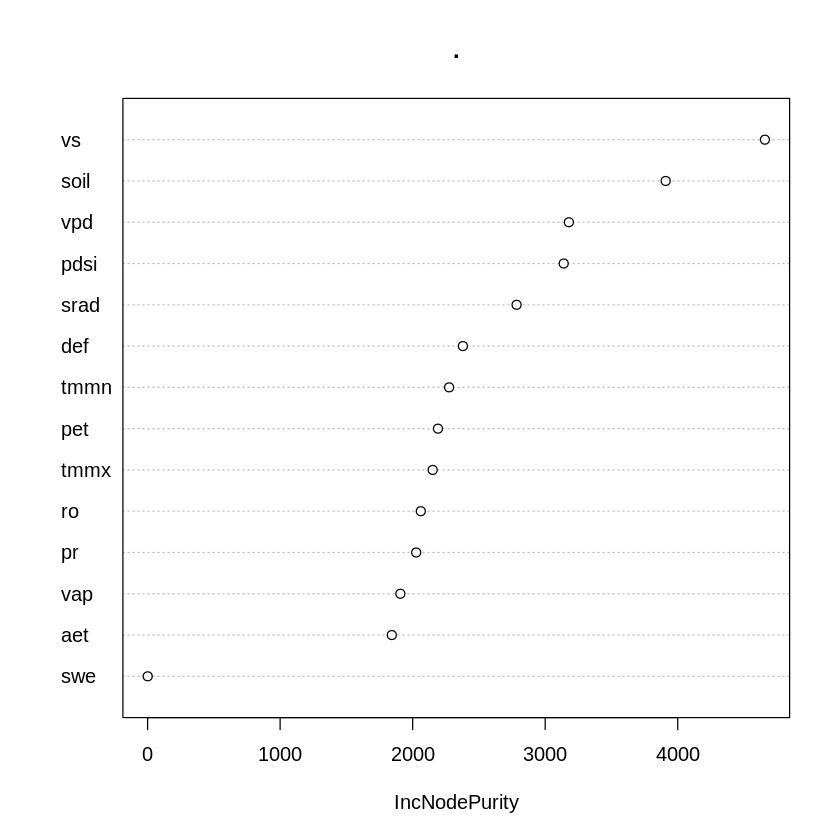

In [72]:
rf_terra <- randomForest(rf_form,rf_dt[complete.cases(rf_dt[,-2]),],verbose=T)
rf_terra %>% varImpPlot
rf_terra

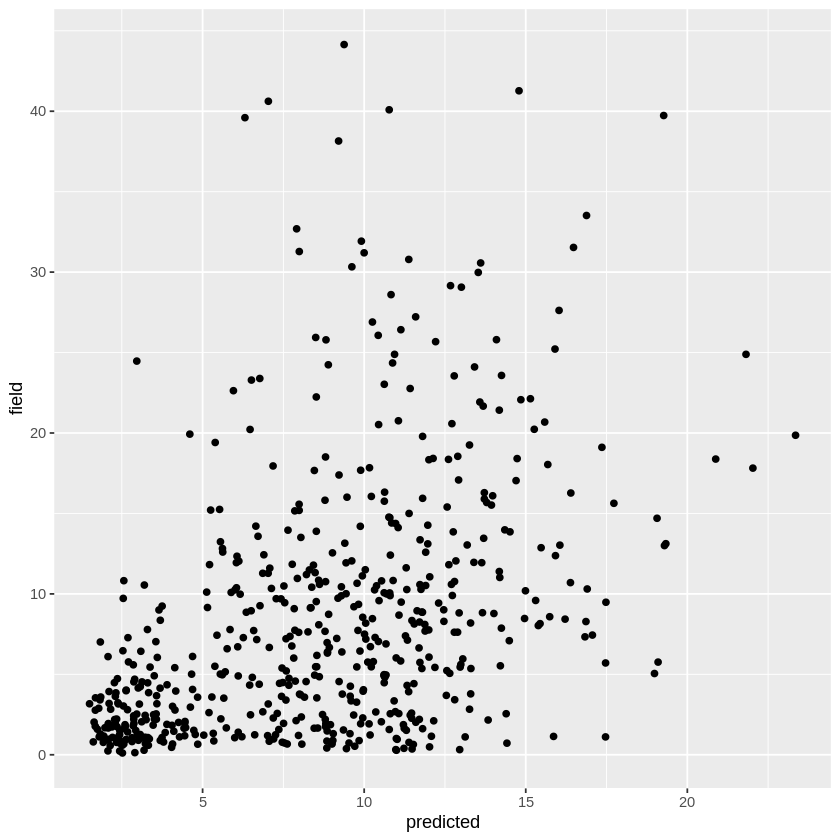

In [84]:
data.frame(field = rf_terra$y,predicted = rf_terra$predicted) %>%
  ggplot(aes(x=predicted,y=field))+
  geom_point()